**SISTEM ANALISIS CITRA MEDIS UNTUK DETEKSI TUMOR OTAK MENGGUNAKAN COMPUTER VISION DAN CNN**

**1. Import Library**

Sistem melakukan pemanggilan seluruh library yang dibutuhkan untuk membangun aplikasi Computer Vision. Library OpenCV digunakan untuk melakukan berbagai operasi pengolahan citra seperti konversi warna, deteksi tepi, dan segmentasi. NumPy dimanfaatkan untuk operasi matematika dan manipulasi array citra, sedangkan Matplotlib digunakan untuk menampilkan hasil visualisasi citra. Selain itu, TensorFlow Keras digunakan untuk membangun dan mengelola model Convolutional Neural Network yang berperan dalam proses klasifikasi citra MRI.

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

**2. Load Citra MRI**

Citra MRI otak dimuat ke dalam sistem dalam format grayscale. Pemilihan format grayscale dilakukan karena citra MRI pada umumnya tidak memerlukan informasi warna, melainkan hanya berdasarkan intensitas piksel. Citra yang telah dimuat kemudian ditampilkan untuk memastikan bahwa data berhasil dibaca dengan benar sebelum diproses ke tahap selanjutnya.

(np.float64(-0.5), np.float64(457.5), np.float64(459.5), np.float64(-0.5))

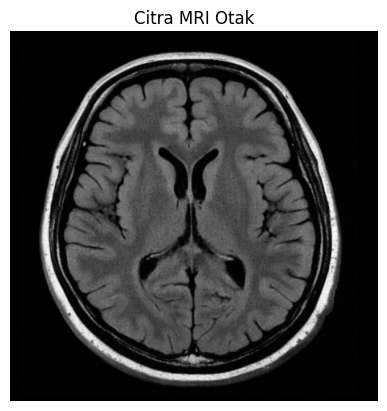

In [ ]:
img = cv2.imread('gambar/mri1.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Citra MRI Otak")
plt.axis('off')

**3. Preprocessing & Normalisasi**

Tahap ini melakukan praproses terhadap citra MRI yang meliputi penyeragaman ukuran dan normalisasi nilai piksel. Citra diubah ke ukuran yang sama agar konsisten dalam seluruh proses pengolahan dan sesuai dengan kebutuhan input CNN. Normalisasi nilai piksel ke rentang 0 hingga 1 dilakukan untuk meningkatkan stabilitas perhitungan serta mempercepat proses pembelajaran model.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

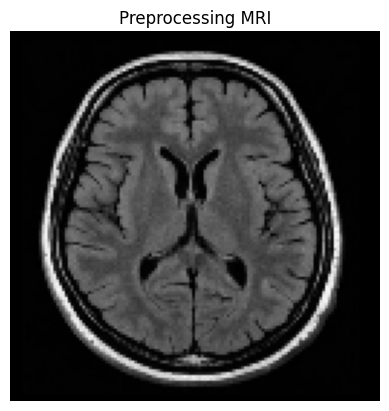

In [46]:
img_resized = cv2.resize(img, (128,128))
img_norm = img_resized / 255.0

plt.imshow(img_norm, cmap='gray')
plt.title("Preprocessing MRI")
plt.axis('off')

**4. Edge Detection**

Sistem melakukan deteksi tepi menggunakan metode Canny. Tahap ini bertujuan untuk menonjolkan perubahan intensitas yang signifikan pada citra, yang umumnya menunjukkan batas antara struktur jaringan otak dan area yang diduga sebagai tumor. Informasi tepi ini membantu sistem dalam memahami bentuk dan struktur objek pada citra MRI.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

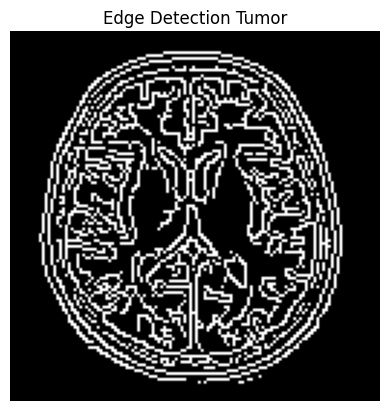

In [47]:
edges = cv2.Canny(img_resized, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title("Edge Detection Tumor")
plt.axis('off')

**5. Segmentasi Tumor**

Proses segmentasi citra untuk memisahkan area tumor dari latar belakang. Metode thresholding digunakan untuk membedakan area dengan intensitas tertentu yang diasumsikan sebagai tumor. Selanjutnya, operasi morfologi diterapkan untuk mengurangi noise dan memperbaiki hasil segmentasi sehingga area tumor dapat terlihat lebih jelas dan terisolasi.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

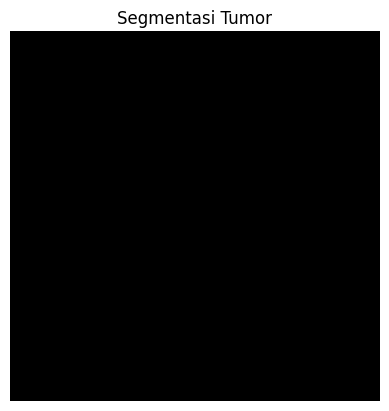

In [48]:
_, thresh = cv2.threshold(img_resized, 140, 255, cv2.THRESH_BINARY)
kernel = np.ones((5,5), np.uint8)
segment = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.imshow(segment, cmap='gray')
plt.title("Segmentasi Tumor")
plt.axis('off')

**6. Boundary Detection**

Sistem mengekstraksi batas atau kontur dari hasil segmentasi untuk menentukan lokasi dan bentuk tumor. Kontur yang diperoleh kemudian ditampilkan kembali pada citra MRI asli, sehingga posisi tumor dapat divisualisasikan dengan lebih mudah dan intuitif.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

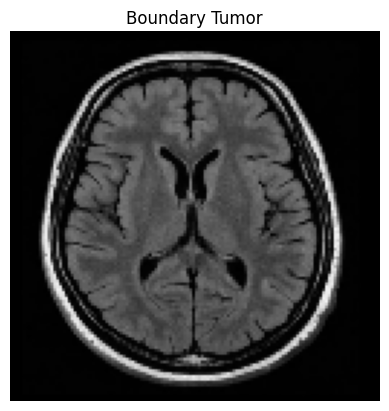

In [49]:
contours, _ = cv2.findContours(segment, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

output = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0,255,0), 2)

plt.imshow(output)
plt.title("Boundary Tumor")
plt.axis('off')

**7. Dataset CNN**

Sistem menyiapkan data yang akan digunakan sebagai input dan label untuk proses klasifikasi menggunakan CNN. Data citra dan kelas target disusun dalam bentuk array, kemudian label dikonversi ke format kategorikal agar sesuai dengan mekanisme klasifikasi multi-kelas pada model CNN. Tahap ini merupakan persiapan penting sebelum proses pelatihan model dilakukan.

In [50]:
X = np.random.rand(200, 128, 128, 1)
y = np.random.randint(0, 2, 200)

y = to_categorical(y, 2)

**8. Model CNN**

Arsitektur Convolutional Neural Network dibangun sebagai model utama untuk mengenali keberadaan tumor pada citra MRI. Model ini terdiri dari beberapa lapisan konvolusi untuk mengekstraksi fitur visual penting, lapisan pooling untuk mengurangi dimensi data, serta lapisan fully connected untuk melakukan proses klasifikasi akhir berdasarkan fitur yang telah dipelajari.

In [51]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(2,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**9. Augmented Reality Visualization**

Hasil analisis sistem divisualisasikan dalam bentuk Augmented Reality sederhana dengan menambahkan informasi teks langsung pada citra MRI. Overlay ini bertujuan untuk menampilkan hasil deteksi secara visual sehingga lebih mudah dipahami oleh pengguna. Tahap ini menunjukkan penerapan konsep Augmented Reality dalam konteks analisis citra medis.

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

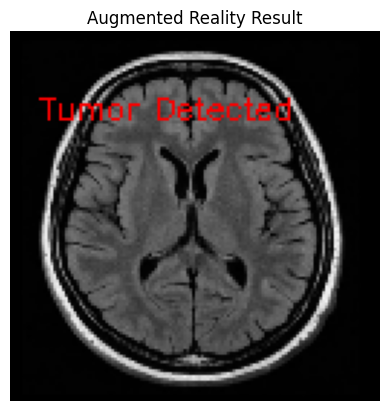

In [52]:
cv2.putText(
    output,
    "Tumor Detected",
    (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.35,          
    (250, 0, 0),
    1            
)

plt.imshow(output)
plt.title("Augmented Reality Result", fontsize=12)
plt.axis('off')
